# Лабораторная работа №1
### Минаев Виталий, группа 520

## 1. Постановка задачи

Для каждого изображения из предоставленного набора необходимо решить следующие задачи:

1. Определить количество карточек на изображении при условии, если:
    1. карточки изолированные
    2. карточки накладываются друг на друга   
2. Определить фигуру на карточке:
    1. определить тип фигуры - многоугольник или фигура с гладкой границей
    2. для многоугольников определить количество вершин
    3. определить, является ли многоугольник выпуклым.
    
Все задачи ставятся в двух вариантах: с белым и с пёстрым фоном.

## 2. Описание данных

Предоставлен набор следующих изображений:
1. Карточки на белом фоне без пересечений
2. Карточки на белом фоне с пересечениями
3. Карточки на пестром фоне без пересечений

In [2]:
from skimage import io
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [24.0, 20.0]

camera1 = io.imread('./Sample/IMG1.jpg')
camera2 = io.imread('./Sample/IMG5.jpg')
camera3 = io.imread('./Sample/IMG6.jpg')

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
ax1.imshow(camera1)
ax2.imshow(camera2)
ax3.imshow(camera3)


## 3. Описание метода решения

Для решения поставленной задачи были предприняты следующие шаги:
1. #### Получение битовых масок для фигурок на карточках и подсчет их количества:
    1. Было проведено отсечение белого и пестрого фона путем подбора нужного порога бинаризации после перехода в цветовую схему HSV.
    2. Было проведено удаление элементов карточек, усложняющих последующий анализ изображений: транспортиров, циркулей, мелков путем подбора порогов в H- и S- компонентах изображений.
    3. С помощью морфологических операций были убраны шумы, маленькие дырки в масках, а также те части голубого фона карточек, которые оказались отрезанными от основных частей после удаления транспортиров и циркулей. Данный шаг позволил получить маску для последующего выделения фигур на изображениях.
    4. К изображению, полученному после применения операции размытия гауссовым фильтром, была применена маска, полученная на шаге 3. Данный факт позволил нам ограничить область последующего применения фильтра Собеля и выделить границы только на самих карточках.
    5. На данном шаге было проведено отсечение по порогу неинтересующих нас границ, чтобы оставить на изображении только границы фигурок, которые нужно распознать. Оставшиеся шумы убирались путем применения морфологических операций.
    6. Далее проводилась заливка связных областей, чтобы получить искомые объекты в виде растровых пятен.
    7. На данном шаге мы получаем ответ к задачам 1А и 1Б путем подсчета количества связных компонент, так как фигурка на карточке взаимно однозначно соответствует карточке.
2. #### Определение формы фигуры на карточке:
    1. На первом шаге проводилась аппроксимация контуров фигур.
    2. Основным критерием для отделения большей части многоугольников от остальных фигур было выбрано отношение максимальной длины ребра контура, полученного на шаге 1, к периметру фигуры. Данный критерий позволил хорошо отделить большое количество многоугольников, так как у гладких фигур после аппроксимации контура обычно не было достаточно длинных ребер.
    3. Для разделения оставшейся группы фигур на многоугольники и гладкие фигуры было принято решение строить более "грубые" аппроксимации контуров с меньшим количеством ребер, чтобы отделить многоугольники с не очень большими сторонами от гладких кривых. Для увеличения различия между многоугольниками и гладкими кривыми в данной метрике проводилось домножение на количество ребер построенного аппроксимирующего контура. Данный подход позволил отделить все многоугольники от гладких кривых, за исключением восьмиугольников, по форме очень близких к кругу.
    4. Результатом данного этапа было получение маски, содержащей многоугольники, и маски, содержащей гладкую кривую.
3. #### Проверка многоугольников на выпуклость:
    1. Критерием для проверки многоугольника на выпуклость стало отношение площади внутри его выпуклой оболочки к площади самого многоугольника. В случае, когда многоугольник является выпуклым, данное отношение близко к единице. Для наглядности было принято решение вычесть из этого отношения единицу и сравнивать получившееся значение с нулем.

## 4. Описание программной реализации

### Функция `def get_card_mask(camera, complexBackground)`
Используется для получения маски голубого фона карточек, на котором на следующем шаге мы хотим найти объекты, нарисованные на карточках. 
#### Параметры:
1. `camera` - исходное изображение,
2. `complexBackground` - флаг, который должен быть равен `True`, если мы работаем с пестрым фоном, и `False` при работе с белым.

#### Возвращаемое значение: 
маска голубого фона карточек
 
### Функция `def get_figures(camera, card_mask)`
Используется для получения маски фигурок на карточках.
#### Параметры:
1. `camera` - исходное изображение,
2. `card_mask` - маска, полученная на шаге 1.

#### Возвращаемое значение: 
маска фигурок на карточках

### Функция `def count_cards(fill_fig)`
Используется для подсчета количества фигурок на карточках.
#### Параметры:
1. `fill_fig` - маска фигурок на карточках

#### Возвращаемое значение: 
маска фигурок на карточках

### Функция `def classify_fig(fill_fig)`:
Используется для классификации фигурок на карточках на многоугольники и гладкие фигуры.
#### Параметры:
`fill_fig` - маска фигурок на карточках
#### Возвращаемое значение: 
две маски: маска многоугольников и маска гладких фигур

### Функция `def isConvex(polygon_mask)`:
Используется для проверки многоугольников на выпуклость и разметки результирующего изображения.
#### Параметры:
`fill_fig` - маска многоугольников на карточках
#### Возвращаемое значение: 
две маски: маска выпуклых многоугольников и маска невыпуклых многоугольников

   


## 5. Эксперименты

Рассмотрим пошагово алгоритмы извлечения необходимой информации из изображений с белым и пестрым фоном. Единственное различие между работой с белым и с пестрым фоном заключается в разных порогах для отделения карточек от фона на этапе бинаризации. Вся дальнейшая работа производится с масками и изображениями, фон на которых удаляется посредством применения построенных масок.

### 1. Получение битовых масок для фигурок на карточках и подсчет их количества:

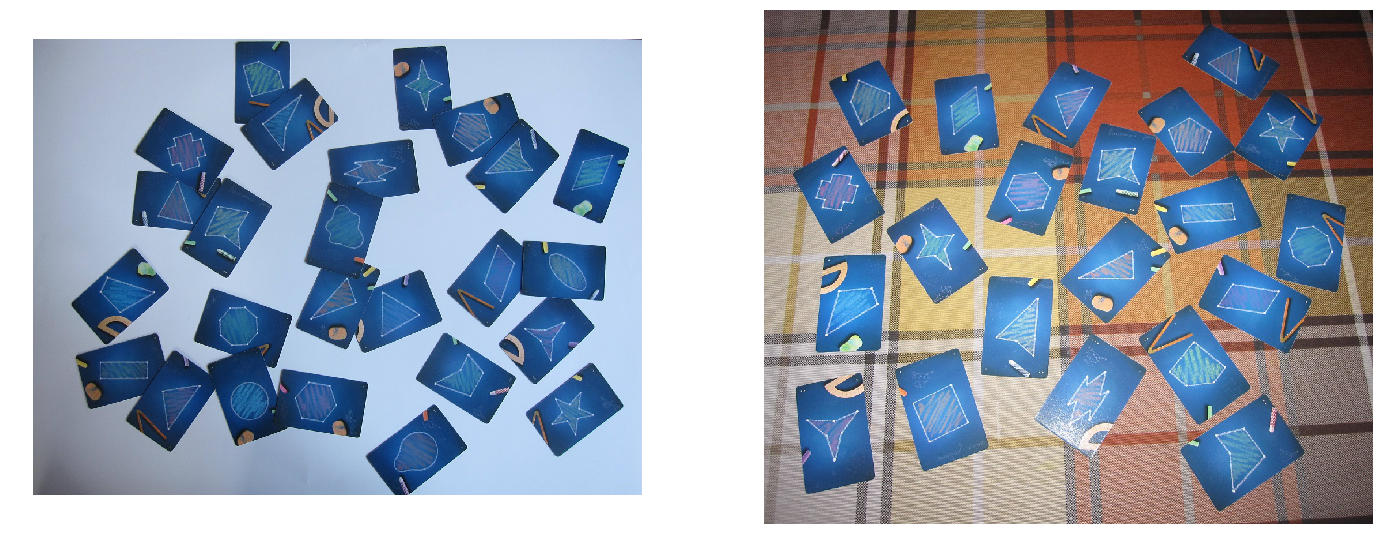

In [3]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera2)
ax2.axis('off')
ax2.imshow(camera3)

#### Результат применения функции `get_card_mask(camera, complexBackground)`:
Получены маски для голубого фона карточек. Данные маски позволят нам выделить фигурки на карточках на следующем шаге.

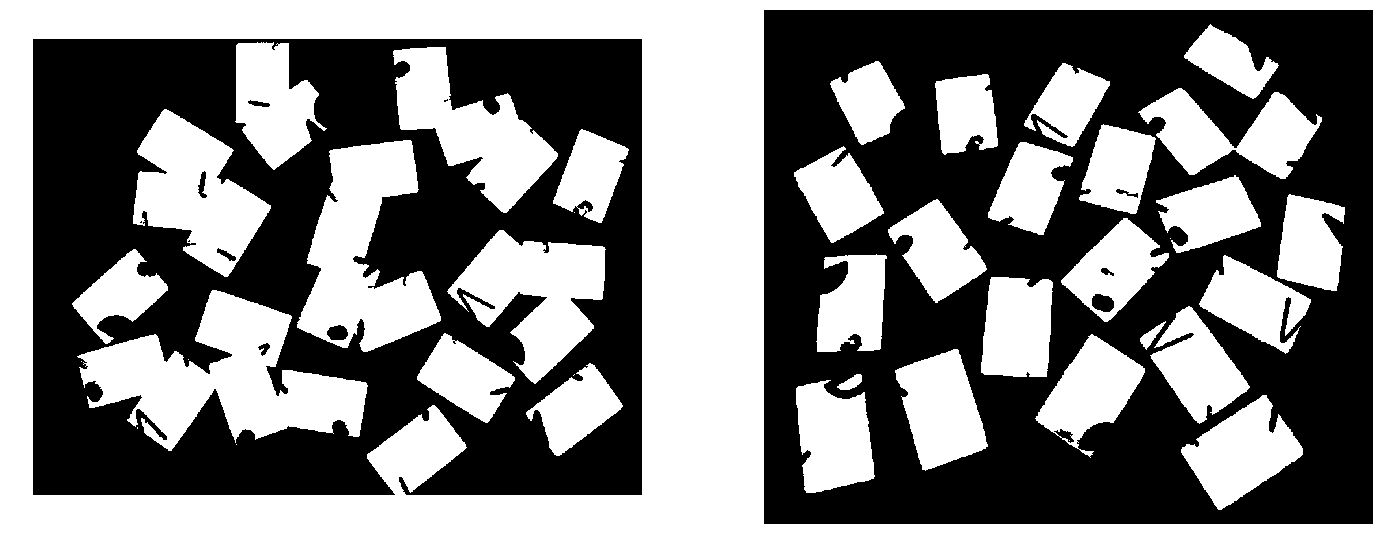

In [4]:
camera1 = io.imread('./report/card_mask5.png')
camera2 = io.imread('./report/card_mask6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

#### Результат применения функции `get_figures(camera, card_mask)`:
Получены маски для фигурок на карточках, с которыми мы будем дальше работать для классификации фигур и определения их свойств.

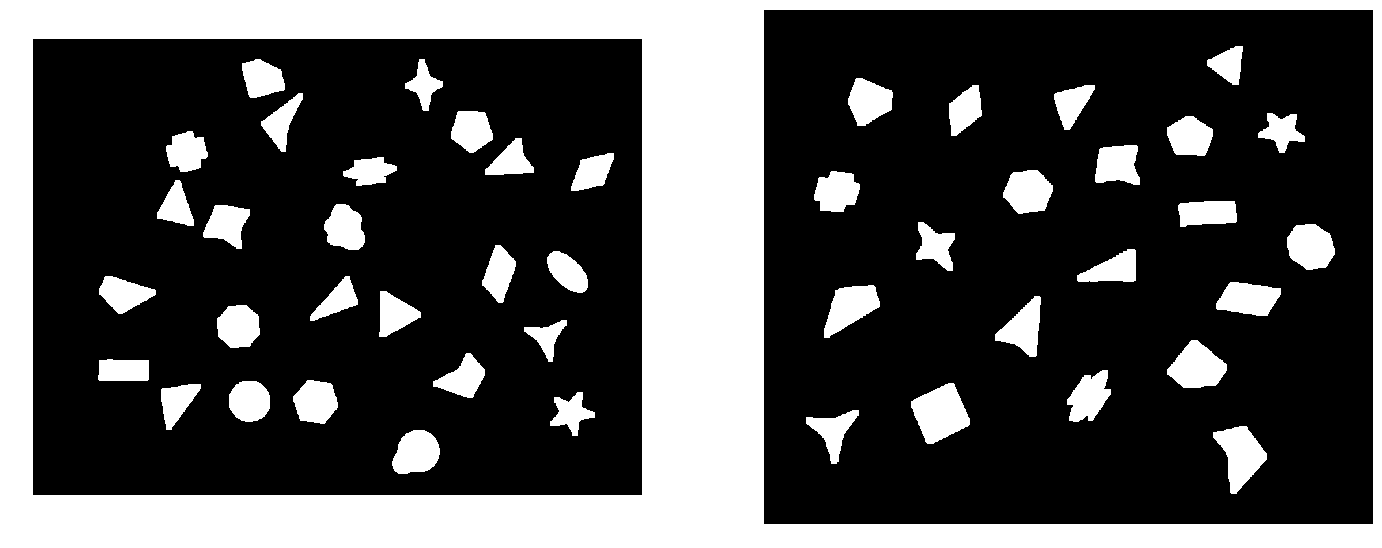

In [5]:
camera1 = io.imread('./report/fill_fig5.png')
camera2 = io.imread('./report/fill_fig6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

#### Результат подсчета количества фигурок с помощью функции `def count_cards(fill_fig)`:
Мы можем установить взаимно однозначное соответствие между карточками и изображенными на них геометрическими фигурами, поэтому подсчет количества карточек можно провести, подсчитав количество фигурок.

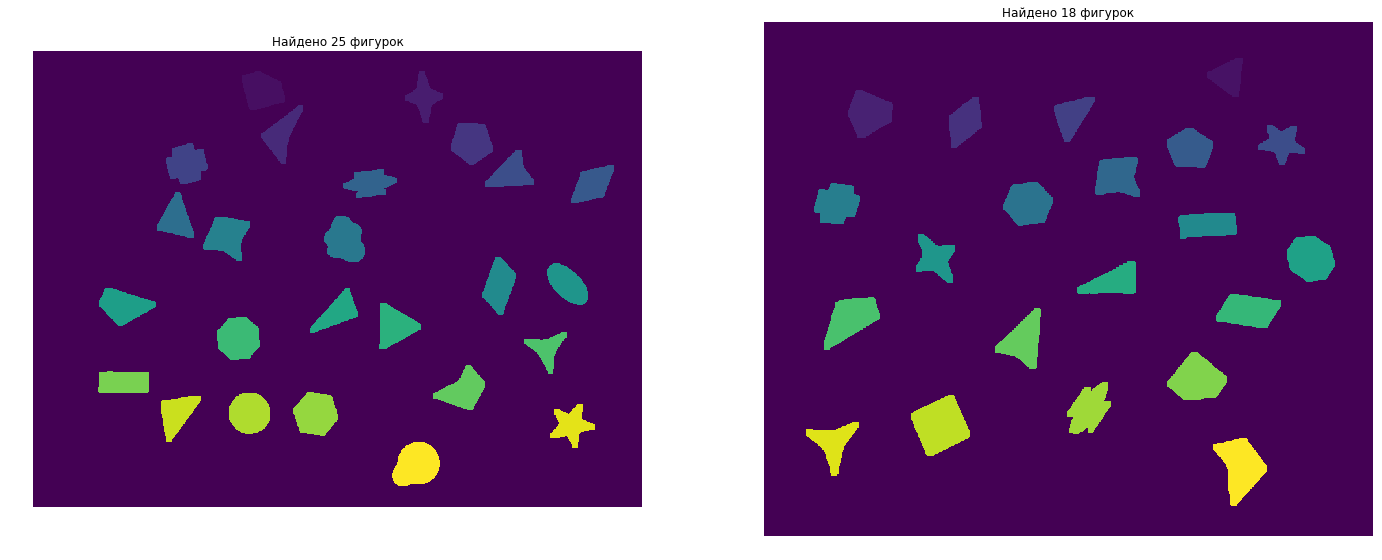

In [6]:
camera1 = io.imread('./report/label_image5.png')
camera2 = io.imread('./report/label_image6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.set_title('Найдено 25 фигурок')
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.set_title('Найдено 18 фигурок')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

### 2. Классификация фигурок по типу границы

На данном этапе хотелось бы провести классификацию фигурок на многоугольники и фигуры с гладкой границей. 

Разделение фигурок проводилось в несколько шагов:
1. На первом шаге были отобраны многоугольники, имеющие достаточно длинные ребра в аппроксимированной границе фигурки. В качестве критерия рассматривалось отношение максимальной длины ребра в аппроксимированном контуре к периметру фигурки. Фигурки, отнесенные к многоугольникам на данном шаге, имеют синюю границу.
2. На следующем шаге была принята попытка отделить многоугольники, имеющие небольшие и примерно равные стороны ("звездочки" и восьмиугольники) от фигур с гладкой границей. Во-первых, была проведена более грубая аппроксимация контуров оставшихся фигурок, чтобы многоугольники имели более длинные ребра по результатам аппроксимации. В качестве критерия рассматривалось отношение самого длинного ребра в аппроксимированном контуре к площади фигуры. Данный шаг позволил отделить "звездочки" различной формы, так как при равенстве самых длинных ребер у восьмиугольников и "звездочек", последние имеют меньшую площадь. Фигурки, выделенные на данном шаге, имеют желтую границу.
3. Все оставшиеся фигуры считаются фигурами с гладкими границами и помечены красным цветом. К сожалению, восьмиугольники не получилось отделить от фигурок с гладкими границами на всех картинках, поэтому имеются ошибки классификации.

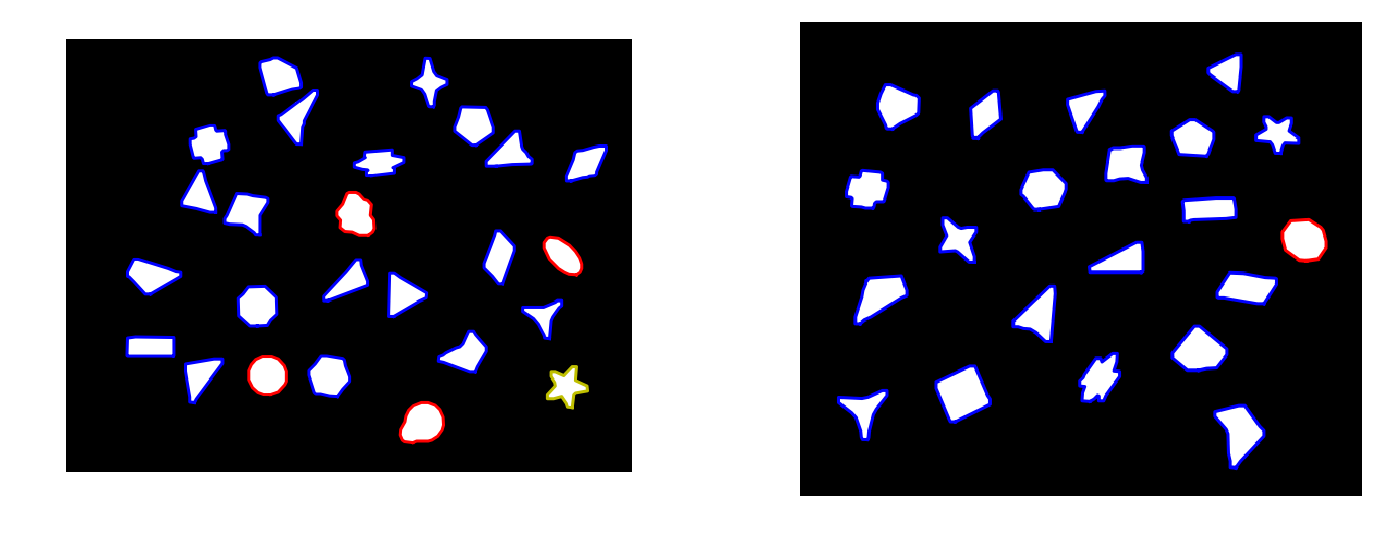

In [7]:
camera1 = io.imread('./report/classification5.png')
camera2 = io.imread('./report/classification6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

### 3. Выпуклость многоугольников

В данном разделе рассмотрим процесс проверки выделенных многоугольников на выпуклость. В качестве входных данных рассматриваем маски многоугольников для соответствующих картинок:

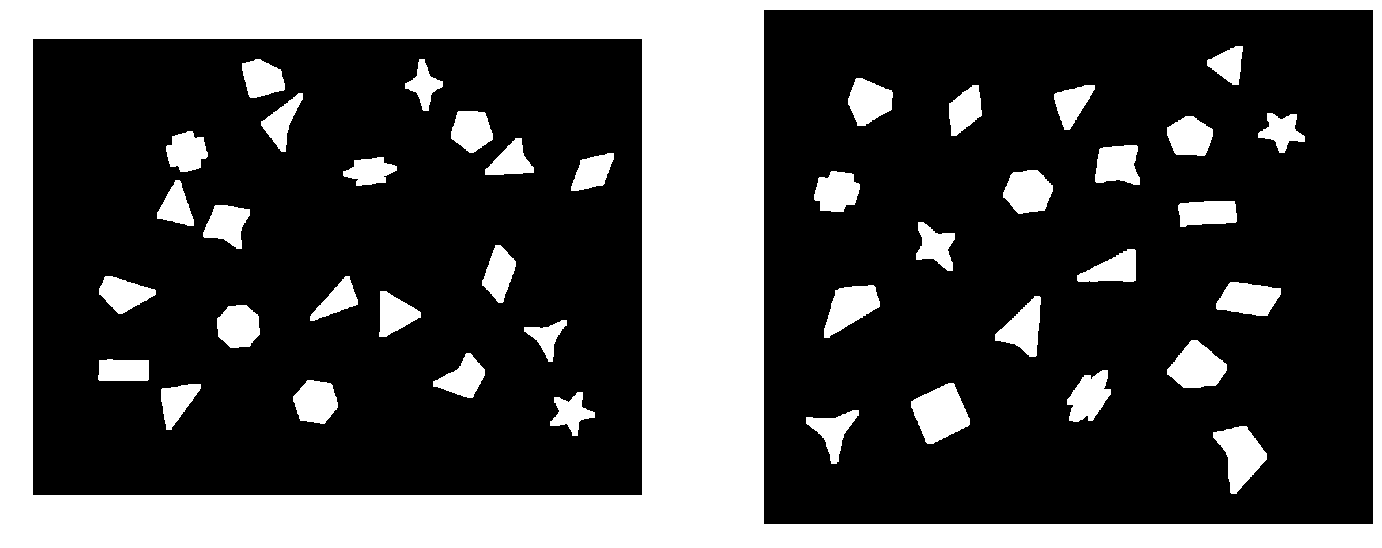

In [8]:
camera1 = io.imread('./report/polygon_mask5.png')
camera2 = io.imread('./report/polygon_mask6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

Основная идея критерия проверки многоугольника на выпуклость заключается в том, что площадь внутри выпуклой оболочки выпуклого многоугольника незначительно отличается от площади самого выпуклого многоугольника, поэтому было принято решение рассмотреть отношение данных величин. В том случае, если многоугольник выпуклый, данное отношение должно быть близко к единице. 

Ниже представлен результат работы функции `isConvex(polygon_mask, camera)`, которая выделяет контуры выпуклых фигур синим цветом, а контуры невыпуклых фигур - красным.

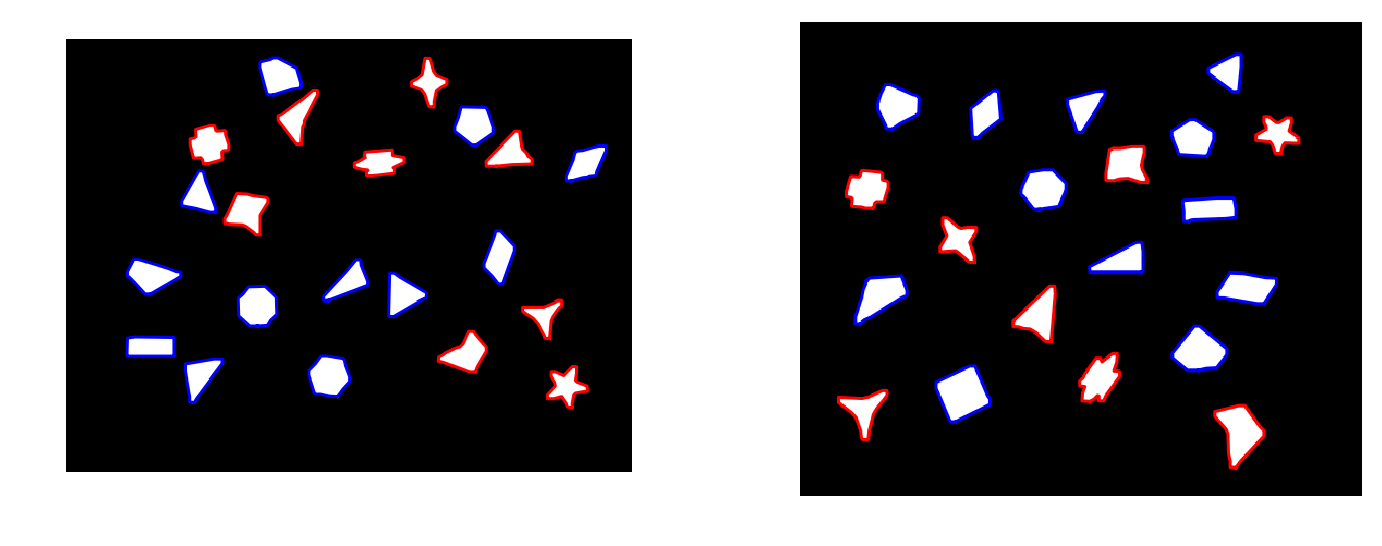

In [9]:
camera1 = io.imread('./report/convex5.png')
camera2 = io.imread('./report/convex6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

### 4. Маркировка карточек

Маркировка карточек проводится внутри функции `isConvex(polygon_mask, camera)` в момент принятия решения о том, является ли данная фигурка на карточке выпуклой или невыпуклой:

In [10]:
camera1 = io.imread('./report/labelling5.png')
camera2 = io.imread('./report/labelling6.png')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.axis('off')
ax1.imshow(camera1, cmap='gray')
ax2.axis('off')
ax2.imshow(camera2, cmap='gray')

### Результаты работы программы для всех тестовых изображений:

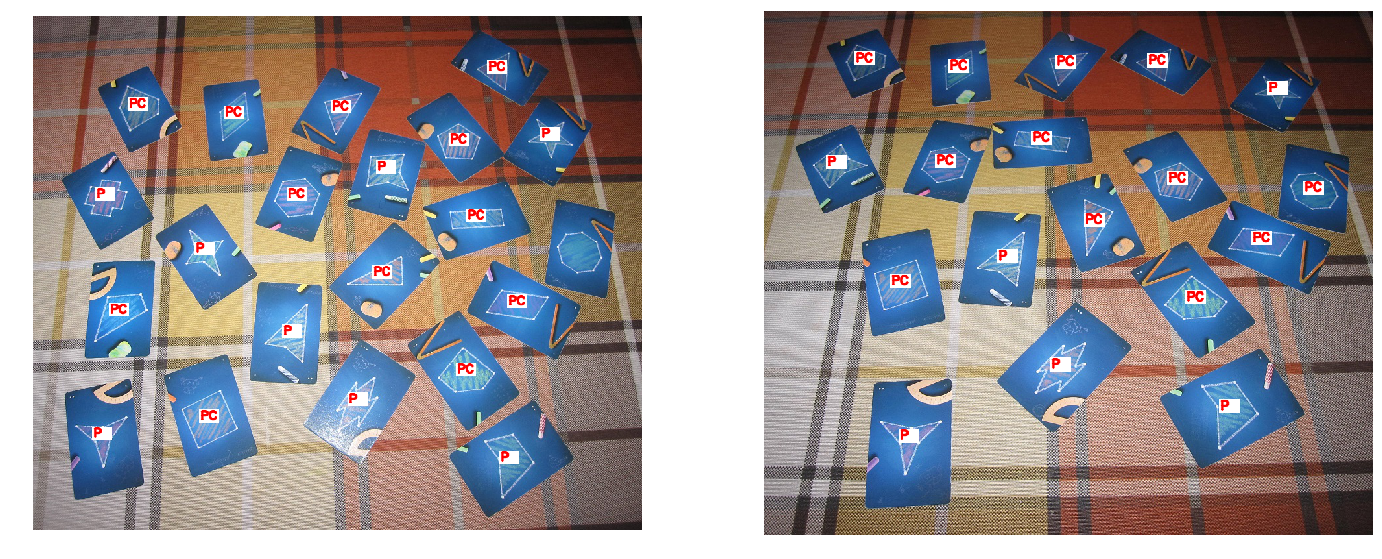

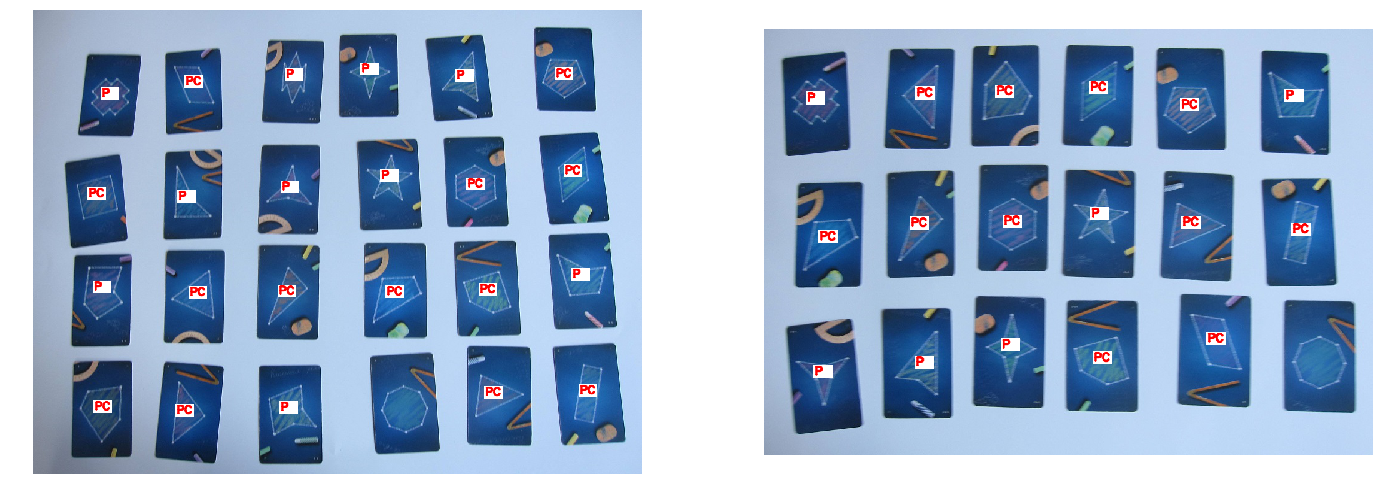

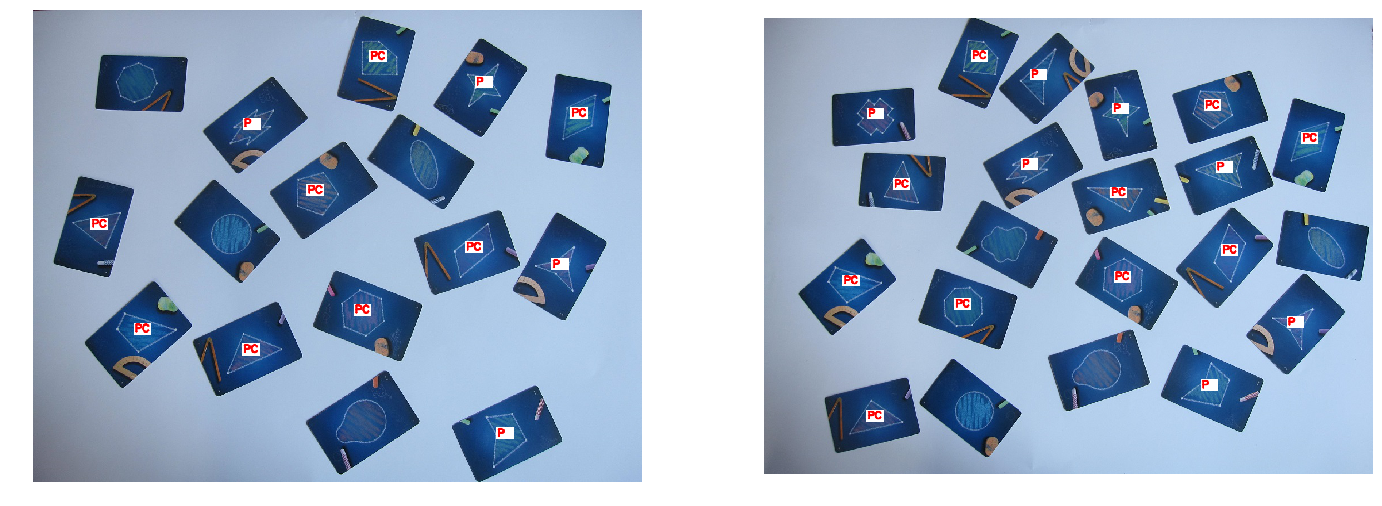

In [11]:
camera1 = io.imread('./report/labelling1.png')
camera2 = io.imread('./report/labelling2.png')
camera3 = io.imread('./report/labelling3.png')
camera4 = io.imread('./report/labelling4.png')
camera5 = io.imread('./report/labelling5.png')
camera6 = io.imread('./report/labelling6.png')
camera7 = io.imread('./report/labelling7.png')

f0, (ax01, ax02) = plt.subplots(1,2)
ax01.axis('off')
ax01.imshow(camera6)
ax02.axis('off')
ax02.imshow(camera7)
f1, (ax11, ax12) = plt.subplots(1,2)
ax11.axis('off')
ax11.imshow(camera1)
ax12.axis('off')
ax12.imshow(camera2)
f2, (ax21, ax22) = plt.subplots(1,2)
ax21.axis('off')
ax21.imshow(camera3)
ax22.axis('off')
ax22.imshow(camera4)


## 5. Выводы

В ходе работы были применены различные методы обработки изображений для решения следующих категорий задач:
1. #### Сегментация изображений:
    Использование следующих подходов позволило очень эффективно выделить фигурки на карточках:
    1. преобразование изображение к цветовой схеме HSV
    2. отсечение по порогу для выделения интересующих частей изображения
    3. различные морфологические операции (эрозия, дилатация и производные от них)
2. #### Классификация фигурок по типу границы
    Количественные критерии, построенные на основе геометрических соображений, позволили правильно классифицировать большую часть многоугольников, но их оказалось недостаточно для правильной классификации всех объектов. Возникли проблемы с восьмиугольниками, форма которых достаточно близка к форме круга. Видимо, для выделения восьмиугольников среди гладких фигур нужны более серьезные критерии.
3. #### Классификация многоугольников на выпуклые и невыпуклые
    Критерий отношения площади внутри выпуклой оболочки многоугольника и площади самого многоугольника позволил разделить выпуклые и невыпуклые многоугольники без ошибок.
4. #### Определение количества вершин многоугольников
    Были предприняты попытки провести достаточно грубую аппроксимацию контуров многоугольников в надежде, что количество вершин построенных аппроксимирующих ломаных будет равно количеству вершин многоугольников. Данный подход позволил правильно определить количество вершин только для выпуклых многоугольников с числом вершин, меньшим шести.
    
    